In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [6]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

In [8]:
hypothesis = tf.matmul(X, W) + b

In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = hypothesis, labels = tf.stop_gradient(Y)))

In [10]:
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [11]:
correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Epoch: 0001, Cost: 5.710422363
Epoch: 0002, Cost: 1.753264147
Epoch: 0003, Cost: 1.126559924
Epoch: 0004, Cost: 0.869564897
Epoch: 0005, Cost: 0.729608807
Epoch: 0006, Cost: 0.657882616
Epoch: 0007, Cost: 0.590379597
Epoch: 0008, Cost: 0.560663190
Epoch: 0009, Cost: 0.516291335
Epoch: 0010, Cost: 0.487246545
Epoch: 0011, Cost: 0.469340449
Epoch: 0012, Cost: 0.447584467
Epoch: 0013, Cost: 0.429196916
Epoch: 0014, Cost: 0.419524111
Epoch: 0015, Cost: 0.406586190
Epoch: 0016, Cost: 0.398597487
Epoch: 0017, Cost: 0.381834345
Epoch: 0018, Cost: 0.373036566
Epoch: 0019, Cost: 0.369862598
Epoch: 0020, Cost: 0.365792141
Epoch: 0021, Cost: 0.353815298
Epoch: 0022, Cost: 0.343814229
Epoch: 0023, Cost: 0.345318296
Epoch: 0024, Cost: 0.340690335
Epoch: 0025, Cost: 0.332749630
Epoch: 0026, Cost: 0.325372094
Epoch: 0027, Cost: 0.322274039
Epoch: 0028, Cost: 0.322207213
Epoch: 0029, Cost: 0.318264756
Epoch: 0030, Cost: 0.308324102
Epoch: 0031, Cost: 0.303653045
Epoch: 0032, Cost: 0.310001582
Epoch: 0

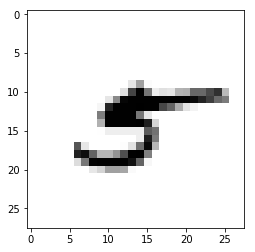

In [14]:
# train my model
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs) :
        avg_cost = 0
        
        for iteration in range(num_iterations) :
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict = {X : batch_xs, Y : batch_ys})
            avg_cost += cost_val / num_iterations
            
        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")
    
    print("Learning Finished!")
    
    # Test model and check accuracy
    print("Accuracy : ", sess.run(accuracy, feed_dict={X : mnist.test.images, Y : mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples-1)
    
    print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1], axis = 1)))
    print("Prediction : ", sess.run(tf.argmax(hypothesis, axis = 1), feed_dict = {X : mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys", interpolation = "nearest")
    plt.show()